# getting data from the one minute dataset

# rollong mean of the volume

# select which stock to be used in the analysis

Top Trading Volume Stocks & AAPL & MGM & FITB & MPC & GS \\
Bottom Trading Volume Stocks & AEP & HP & KLAC & GPN & ROK \\

In [ ]:
lst = ['AAPL', 'MGM','FITB','MPC','GS','AEP','HP','KLAC','GPN','ROK']
for symbol in lst:

In [ ]:
%%bash
docker build --build-arg UID=$UID --build-arg GIT_TOKEN=$GIT_TOKEN -t d345fn01 .
docker run --name d345fn01 --user $(id -u) -v $(pwd):/homes/80/kang -it --gpus '"device=3,4,5"' d345fn01
docker run -it -v /scratch/local/kang:/data d345fn01

In [ ]:
%%bash
cd /data
touch run12feb.sh
cat > run12feb.sh << 'EOF'
input_dir="/data/" # Directory containing .7z files
sp500_dir="/homes/80/kang/SP500/" # Directory to store all stock data directories 

# Define a list of stock names
declare -a stock_list=('AAPL' 'MGM' 'FITB' 'MPC' 'GS' 'AEP' 'HP' 'KLAC' 'GPN' 'ROK')

# Iterate over each .7z file in the input directory
for file in "$input_dir"/*.7z; do
    # Extract the stock name from the file name
    stock_name=$(echo "$file" | grep -oP '(?<=__)\w+(?=_)')

    # Check if the extracted stock name is in the list
    if [[ " ${stock_list[@]} " =~ " ${stock_name} " ]]; then
        # Create directories for the stock data and its subdirectories
        stock_dir="${sp500_dir}${stock_name}_data"
        mkdir -p "$stock_dir/Book_10" "$stock_dir/Flow_10"

        # Unzip the file into a temporary directory
        temp_dir=$(mktemp -d)
        7z x "$file" -o"$temp_dir"

        # Move files to appropriate subdirectories
        for csv_file in "$temp_dir"/*.csv; do
            if [[ $csv_file == *"orderbook"* ]]; then
                mv "$csv_file" "$stock_dir/Book_10/"
            elif [[ $csv_file == *"message"* ]]; then
                mv "$csv_file" "$stock_dir/Flow_10/"
            fi
        done

        # Remove the temporary directory
        rm -r "$temp_dir"

        # Move the stock directory into the SP500 directory
        # mv "$stock_dir" "$sp500_dir/" # This line is not needed since "$stock_dir" already includes "$sp500_dir"
    fi
done
EOF



In [5]:
%%bash
cd /homes/80/kang/SP500/
ls -lh

total 76K
drwxr-xr-x 4 kang        3509  82 Dec  7 15:40 AAL_data
drwxr-xr-x 4 kang        3509  82 Dec  6 06:40 AAP_data
drwxr-xr-x 4 kang        3509  48 Nov 27 14:19 AAPL_data
drwxr-xr-x 4 kang        3509  48 Nov 27 14:30 ABBV_data
drwxr-xr-x 4 kang        3509  82 Dec  7 09:09 ABC_data
drwxr-xr-x 4 kang        3509  48 Nov 27 14:33 ABMD_data
drwxr-xr-x 4 kang        3509  48 Nov 27 14:33 ABT_data
drwxr-xr-x 4 kang        3509  82 Dec  7 04:01 ACN_data
drwxr-xr-x 4 kang        3509  48 Nov 27 14:36 ADBE_data
drwxr-xr-x 4 kang users        82 Jan 22 12:45 BAC_data
drwxr-xr-x 4 kang        3509  48 Dec 10 03:01 CHD_data
drwxr-sr-x 4 kang flair-users  48 Dec  7 09:31 CLX_data
-rw-r--r-- 1 kang        3509 73K Dec  4 07:27 state_arrays_kang.pkl


In [ ]:
(base) kang@flair-node-01:/scratch/local/kang/SP500$ du -lh
7.6G    ./AEP_data/Book_10
1.6G    ./AEP_data/Flow_10
9.2G    ./AEP_data
7.0G    ./GS_data/Book_10
1.4G    ./GS_data/Flow_10
8.4G    ./GS_data
16G     ./FITB_data/Book_10
3.0G    ./FITB_data/Flow_10
19G     ./FITB_data
0       ./HP_data/Book_10
0       ./HP_data/Flow_10
0       ./HP_data
2.7G    ./GPN_data/Book_10
579M    ./GPN_data/Flow_10
3.3G    ./GPN_data
0       ./KLAC_data/Book_10
0       ./KLAC_data/Flow_10
0       ./KLAC_data
54G     ./AAPL_data/Book_10
11G     ./AAPL_data/Flow_10
64G     ./AAPL_data
0       ./MGM_data/Book_10
0       ./MGM_data/Flow_10
0       ./MGM_data
0       ./MPC_data/Book_10
0       ./MPC_data/Flow_10
0       ./MPC_data
0       ./ROK_data/Book_10
0       ./ROK_data/Flow_10
0       ./ROK_data
103G    .

In [1]:
lst = ['AEP','GS','FITB','GPN','AAPL']

In [2]:
path = '/scratch/local/kang/SP500'

## vwap file func

In [2]:
common_stocks, common_dates

(array(['AEP'], dtype='<U5'),
 array(['2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25',
        '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
        '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
        '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
        '2017-08-11', '2017-08-14', '2017-08-15', '2017-08-16',
        '2017-08-17', '2017-08-18', '2017-08-21', '2017-08-22',
        '2017-08-23', '2017-08-24', '2017-08-25', '2017-08-28',
        '2017-08-29', '2017-08-30', '2017-08-31', '2017-09-01',
        '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
        '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
        '2017-09-15', '2017-09-18', '2017-09-19', '2017-09-20',
        '2017-09-21', '2017-09-22', '2017-09-25', '2017-09-26',
        '2017-09-27', '2017-09-28', '2017-09-29', '2017-10-02',
        '2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06',
        '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
        '2

In [4]:
# lstsymbols = ['AEP','GS','FITB','GPN','AAPL']
# # lst = ['GPN']
# lst = ['AEP','GS','FITB','AAPL']
# # lst = ['AEP','GS','FITB','GPN','AAPL']
# from tqdm import tqdm
# for symbol in tqdm(lst):
#     ATFolder = f"/scratch/local/kang/SP500/{symbol}_data"
#     # ATFolder = f"/homes/80/kang/SP500/{symbol}_data"
#     # ATFolder = f"/homes/80/kang/SP500/ABC_data"
#     # ATFolder = f"/homes/80/kang/SP500/ACN_data"
#     # ATFolder = f"/homes/80/kang/SP500/AAP_data"
#     common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs = data_alignment(ATFolder)

In [ ]:
RMs

In [4]:
VWAPs

{'AEP':                        x                                            \
 timeHMs             930           945           1000          1015   
 date                                                                 
 2017-07-20  22994.418884  10489.489895  11352.787374  12618.129487   
 2017-07-21  47061.265707  10205.712293   6874.170039  11803.000624   
 2017-07-24  40215.726667  13773.018975  14997.193604  15786.529171   
 2017-07-25  35038.176338   6378.938232   6405.900076  11445.639821   
 2017-07-26  51495.783355   9765.178280  12877.816472  12748.104960   
 ...                  ...           ...           ...           ...   
 2017-12-20  39905.931552  25867.460325  16679.681837  11033.385760   
 2017-12-21  58872.420573  18238.995005  13488.610890  14741.364779   
 2017-12-22  64251.408076   6713.525696   5586.645601   7715.565145   
 2017-12-26  38013.661211  15166.909727  12376.653877   7111.853837   
 2017-12-27  42179.696411  18538.881205  13942.374859  11654.189772   

In [3]:
i = 1

In [4]:
    ob = obs[i]  
    obs1 = ob.iloc[:, [0, 1, 4, 5]]  
    obs1.columns = ['best_ask', 'best_qty', 'second_ask', 'second_qty']  
    msg = msgs[i]  
    msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  

In [8]:
[file.split("_")[1] for file in listdir(ATFolder + "/Book_10/")]

['2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-17',
 '2017-01-18',
 '2017-01-19',
 '2017-01-20',
 '2017-01-23',
 '2017-01-24',
 '2017-01-25',
 '2017-01-26',
 '2017-01-27',
 '2017-01-30',
 '2017-01-31',
 '2017-02-01',
 '2017-02-02',
 '2017-02-03',
 '2017-02-06',
 '2017-02-07',
 '2017-02-08',
 '2017-02-09',
 '2017-02-10',
 '2017-02-13',
 '2017-02-14',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-27',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-06',
 '2017-03-07',
 '2017-03-08',
 '2017-03-09',
 '2017-03-10',
 '2017-03-13',
 '2017-03-14',
 '2017-03-15',
 '2017-03-16',
 '2017-03-17',
 '2017-03-20',
 '2017-03-21',
 '2017-03-22',
 '2017-03-23',
 '2017-03-24',
 '2017-03-27',
 '2017-03-28',
 '2017-03-29',
 '2017-03-30',
 '2017-03-31',
 '2017-04-03',
 '2017-04-04',
 '2017-04-05',
 '2017-04-06',
 '2017-04-

In [7]:
lst = listdir(ATFolder + "/Book_10/")

['AEP_2017-01-03_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-04_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-05_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-06_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-09_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-10_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-11_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-12_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-13_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-17_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-18_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-19_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-20_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-23_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-24_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-25_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-26_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-27_24900000_57900000_orderbook_10.csv',
 'AEP_2017-01-30_24900000_57

In [5]:
file

NameError: name 'file' is not defined

In [16]:
common_dates

array(['2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25',
       '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
       '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
       '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
       '2017-08-11', '2017-08-14', '2017-08-15', '2017-08-16',
       '2017-08-17', '2017-08-18', '2017-08-21', '2017-08-22',
       '2017-08-23', '2017-08-24', '2017-08-25', '2017-08-28',
       '2017-08-29', '2017-08-30', '2017-08-31', '2017-09-01',
       '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
       '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
       '2017-09-15', '2017-09-18', '2017-09-19', '2017-09-20',
       '2017-09-21', '2017-09-22', '2017-09-25', '2017-09-26',
       '2017-09-27', '2017-09-28', '2017-09-29', '2017-10-02',
       '2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06',
       '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
       '2017-10-16', '2017-10-17', '2017-10-18', '2017-

In [20]:
np.intersect1d(common_dates, lobster_dates)

array(['2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25',
       '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
       '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
       '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
       '2017-08-11', '2017-08-14', '2017-08-15', '2017-08-16',
       '2017-08-17', '2017-08-18', '2017-08-21', '2017-08-22',
       '2017-08-23', '2017-08-24', '2017-08-25', '2017-08-28',
       '2017-08-29', '2017-08-30', '2017-08-31', '2017-09-01',
       '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
       '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
       '2017-09-15', '2017-09-18', '2017-09-19', '2017-09-20',
       '2017-09-21', '2017-09-22', '2017-09-25', '2017-09-26',
       '2017-09-27', '2017-09-28', '2017-09-29', '2017-10-02',
       '2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06',
       '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
       '2017-10-16', '2017-10-17', '2017-10-18', '2017-

In [13]:
lobster_dates = np.array([file.split("_")[1] for file in listdir(ATFolder + "/Book_10/")])

In [14]:
lobster_dates

array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06',
       '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10',
       '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16',
       '2017-02-17', '2017-02-21', '2017-02-22', '2017-02-23',
       '2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01',
       '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07',
       '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-13',
       '2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17',
       '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
       '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
       '2017-03-30', '2017-03-31', '2017-04-03', '2017-

In [1]:
from os import listdir  
from tqdm import tqdm  
import pandas as pd  
import numpy as np
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)

lst = ['AEP','GS','FITB','GPN','AAPL']
symbol = 'GPN'



ATFolder = f"/scratch/local/kang/SP500/{symbol}_data"
common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs = data_alignment(ATFolder)  
  
obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Book_10/"))]  
msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/"))]  
# obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Book_10/")[:2])]  
# msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/")[:2])]  
lobster_dates = [file.split("_")[1] for file in listdir(ATFolder + "/Book_10/")]
dates = np.intersect1d(common_dates, lobster_dates)
assert len(obs) == len(msgs)  
  
results = []  
for i in tqdm(range(len(obs))):  
    # prepare ob msg  
    ob = obs[i]  
    obs1 = ob.iloc[:, [0, 1, 4, 5]]  
    obs1.columns = ['best_ask', 'best_qty', 'second_ask', 'second_qty']  
    msg = msgs[i]  
    msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  
  
    # df  
    df = pd.concat([msg, obs1], axis=1)  
    df.time *= 1e9  
    df.time = df.time.apply(pd.to_datetime)  
    df.time = df.time.dt.time  
    df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)  
    df = df[(df['shorten_time'] >= '0930') & (df['shorten_time'] < '1600')]  
  
    # task  
    df['trading_volume'] = df[df.type == 4].qty.sum()  
    task_ratio = 0.05  
    df['task_volume'] = (df.trading_volume * task_ratio).apply(int)  
  
    # dfa  
    dfa = df.drop_duplicates('shorten_time', keep='last')  
  
    # date  
    date = dates[i]  
    # date = '2017-07-20'  # {from file can get this} - This comment suggests you might want to extract the date from a file.  
  
    # rm  
    def get_aligned_values(VWAPs):  
        vwap = VWAPs[symbol].loc[date, :]  
        vwap = vwap.reset_index()  
        vwap.timeHMs = vwap.timeHMs.astype(int).astype(str).apply(lambda x: x.zfill(4))  
        vwap.drop('level_0', axis=1, inplace=True)  
        time_df = pd.DataFrame(df.shorten_time.unique(), columns=['timeHMs'])  
        dfb = pd.merge(vwap, time_df, how='right', on='timeHMs')  
        dfb.fillna(method='ffill', inplace=True)  
        return dfb.iloc[:, -1].to_numpy()  
  
    # jax  
    import jax  
    import jax.numpy as jnp  
  
    @jax.jit  
    def hamilton_apportionment_permuted_jax(votes, seats, key):  
        init_seats, remainders = jnp.divmod(votes, jnp.sum(votes) / seats)  # std_divisor = jnp.sum(votes) / seats  
        remaining_seats = jnp.array(seats - init_seats.sum(), dtype=jnp.int32)  # in {0,1,2,3}  
  
        def f(carry, x):  
            key, init_seats, remainders = carry  
            key, subkey = jax.random.split(key)  
            chosen_index = jax.random.choice(subkey, remainders.size, p=(remainders == remainders.max()) / (remainders == remainders.max()).sum())  
            return (key, init_seats.at[chosen_index].add(jnp.where(x < remaining_seats, 1, 0)), remainders.at[chosen_index].set(0)), x  
  
        (key, init_seats, remainders), x = jax.lax.scan(f, (key, init_seats, remainders), xs=jnp.arange(votes.shape[0]))  
        return init_seats.astype(jnp.int32)  
  
    rng = jax.random.PRNGKey(0)  
    rng, key = jax.random.split(rng, 2)  
  
    # dfa with task info  
    dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)  
    dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)  
    dfa['rm'] = hamilton_apportionment_permuted_jax(get_aligned_values(RMs), dfa.task_volume.iloc[0], key)  
    dfa['twap'] = hamilton_apportionment_permuted_jax(get_aligned_values(TWAPs), dfa.task_volume.iloc[0], key)  
  
    # assert  
    assert (dfa.best_qty + dfa.second_qty >= dfa.vwap).all()  
    assert (dfa.best_qty + dfa.second_qty >= dfa.oracle).all()  
    assert (dfa.best_qty + dfa.second_qty >= dfa.rm).all()  
    assert (dfa.best_qty + dfa.second_qty >= dfa.twap).all()  
    
    # revenue
    def f(x,string):
        if x.best_qty>=x[string]:
            price = x.best_ask * x[string]
        else:
            price = x.best_ask*x.best_qty + x.second_ask*(x[string]-x.best_qty)
        return price
    for s in ['vwap','oracle','rm','twap']:
        dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)
  
    # results  
    dfs = dfa.sum()  
    vwap_advantage = (dfs.vwap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
    oracle_advantage = (dfs.oracle_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
    result = [date, vwap_advantage, oracle_advantage]  
    results.append(result)  
  
dff = pd.DataFrame(results, columns=['date', 'vwap_advantage', 'oracle_advantage'])

NameError: name 'data_alignment' is not defined

In [ ]:
from os import listdir  
from tqdm import tqdm  
import pandas as pd  
import numpy as np
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)

lst = ['AEP','GS','FITB','GPN','AAPL']
symbol = 'GPN'



ATFolder = f"/scratch/local/kang/SP500/{symbol}_data"
common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs = data_alignment(ATFolder)  
  
obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Book_10/"))]  
msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/"))]  
# obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Book_10/")[:2])]  
# msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/")[:2])]  
lobster_dates = [file.split("_")[1] for file in listdir(ATFolder + "/Book_10/")]
dates = np.intersect1d(common_dates, lobster_dates)
assert len(obs) == len(msgs)  
  
results = []  
for i in tqdm(range(len(obs))):  
    # prepare ob msg  
    ob = obs[i]  
    obs1 = ob.iloc[:, [0, 1, 4, 5]]  
    obs1.columns = ['best_ask', 'best_qty', 'second_ask', 'second_qty']  
    msg = msgs[i]  
    msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  
  
    # df  
    df = pd.concat([msg, obs1], axis=1)  
    df.time *= 1e9  
    df.time = df.time.apply(pd.to_datetime)  
    df.time = df.time.dt.time  
    df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)  
    df = df[(df['shorten_time'] >= '0930') & (df['shorten_time'] < '1600')]  
  
    # task  
    df['trading_volume'] = df[df.type == 4].qty.sum()  
    task_ratio = 0.05  
    df['task_volume'] = (df.trading_volume * task_ratio).apply(int)  
  
    # dfa  
    dfa = df.drop_duplicates('shorten_time', keep='last')  
  
    # date  
    date = dates[i]  
    # date = '2017-07-20'  # {from file can get this} - This comment suggests you might want to extract the date from a file.  
  
    # rm  
    def get_aligned_values(VWAPs):  
        vwap = VWAPs[symbol].loc[date, :]  
        vwap = vwap.reset_index()  
        vwap.timeHMs = vwap.timeHMs.astype(int).astype(str).apply(lambda x: x.zfill(4))  
        vwap.drop('level_0', axis=1, inplace=True)  
        time_df = pd.DataFrame(df.shorten_time.unique(), columns=['timeHMs'])  
        dfb = pd.merge(vwap, time_df, how='right', on='timeHMs')  
        dfb.fillna(method='ffill', inplace=True)  
        return dfb.iloc[:, -1].to_numpy()  
  
    # jax  
    import jax  
    import jax.numpy as jnp  
  
    @jax.jit  
    def hamilton_apportionment_permuted_jax(votes, seats, key):  
        init_seats, remainders = jnp.divmod(votes, jnp.sum(votes) / seats)  # std_divisor = jnp.sum(votes) / seats  
        remaining_seats = jnp.array(seats - init_seats.sum(), dtype=jnp.int32)  # in {0,1,2,3}  
  
        def f(carry, x):  
            key, init_seats, remainders = carry  
            key, subkey = jax.random.split(key)  
            chosen_index = jax.random.choice(subkey, remainders.size, p=(remainders == remainders.max()) / (remainders == remainders.max()).sum())  
            return (key, init_seats.at[chosen_index].add(jnp.where(x < remaining_seats, 1, 0)), remainders.at[chosen_index].set(0)), x  
  
        (key, init_seats, remainders), x = jax.lax.scan(f, (key, init_seats, remainders), xs=jnp.arange(votes.shape[0]))  
        return init_seats.astype(jnp.int32)  
  
    rng = jax.random.PRNGKey(0)  
    rng, key = jax.random.split(rng, 2)  
  
    # dfa with task info  
    dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)  
    dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)  
    dfa['rm'] = hamilton_apportionment_permuted_jax(get_aligned_values(RMs), dfa.task_volume.iloc[0], key)  
    dfa['twap'] = hamilton_apportionment_permuted_jax(get_aligned_values(TWAPs), dfa.task_volume.iloc[0], key)  
  
    # assert  
    assert (dfa.best_qty + dfa.second_qty >= dfa.vwap).all()  
    assert (dfa.best_qty + dfa.second_qty >= dfa.oracle).all()  
    assert (dfa.best_qty + dfa.second_qty >= dfa.rm).all()  
    assert (dfa.best_qty + dfa.second_qty >= dfa.twap).all()  
    
    # revenue
    def f(x,string):
        if x.best_qty>=x[string]:
            price = x.best_ask * x[string]
        else:
            price = x.best_ask*x.best_qty + x.second_ask*(x[string]-x.best_qty)
        return price
    for s in ['vwap','oracle','rm','twap']:
        dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)
  
    # results  
    dfs = dfa.sum()  
    vwap_advantage = (dfs.vwap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
    oracle_advantage = (dfs.oracle_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
    result = [date, vwap_advantage, oracle_advantage]  
    results.append(result)  
  
dff = pd.DataFrame(results, columns=['date', 'vwap_advantage', 'oracle_advantage'])

## new code

In [2]:
from os import listdir  
from tqdm import tqdm  
import pandas as pd  
import numpy as np
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)

symbol = 'GPN'
  
ATFolder = f"/scratch/local/kang/SP500/{symbol}_data"  
ob_columns = sum([[f'ask_price_{i}',f'ask_qty_{i}',f'bid_price_{i}',f'bid_qty_{i}'] for i in range(10)] , [])
obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None, names = ob_columns) for file in tqdm(listdir(ATFolder + "/Book_10/"))]  
msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/"))]  


100%|██████████| 251/251 [00:04<00:00, 62.48it/s]


In [33]:
i=0

# prepare ob msg  
ob = obs[i]  
obs1 = ob.loc[:,['bid_price_0','bid_qty_0','bid_price_1','bid_qty_1','bid_price_2','bid_qty_2']]
msg = msgs[i]  
msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  
# df  
df = pd.concat([msg, obs1], axis=1)  
df.time *= 1e9  
df.time = df.time.apply(pd.to_datetime)  
df.time = df.time.dt.time  
df['shorten_time'] = pd.to_datetime(df['time'].apply(lambda x:str(x).split('.')[0]), format='%H:%M:%S').dt.strftime('%H%M').astype(str)  
# df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)  
df = df[(df['shorten_time'] >= '0930') & (df['shorten_time'] < '1600')]  
mean = df[[f'bid_price_{i}' for i in range(3)]].mean().mean() 
mean_ceilling = mean * 10
mean_bottom = mean * 0.1
df=df[(mean_bottom<=df['bid_price_0']) & (df['bid_price_0']<=mean_ceilling)]
df=df[(mean_bottom<=df['bid_price_1']) & (df['bid_price_1']<=mean_ceilling)]
df=df[(mean_bottom<=df['bid_price_2']) & (df['bid_price_2']<=mean_ceilling)]
df
# task  
df['trading_volume'] = df[df.type == 4].qty.sum()  
task_ratio = 0.05  
df['task_volume'] = (df.trading_volume * task_ratio).apply(int)  
# dfa  
dfa = df.drop_duplicates('shorten_time', keep='last')  
dfa

,time,type,id,qty,price,direct,remark,bid_price_0,bid_qty_0,bid_price_1,bid_qty_1,bid_price_2,bid_qty_2,shorten_time
79,09:30:00.008795,1,9051622,100,696600,1,NaN,696600,200,696000,100,688900,800,0930
80,09:30:00.116551,3,8977530,100,696000,1,NaN,696600,200,688900,800,687100,100,0930
81,09:30:00.414950,3,8166518,100,705900,-1,NaN,696600,200,688900,800,687100,100,0930
82,09:30:00.415634,1,9146674,100,702500,-1,NaN,696600,200,688900,800,687100,100,0930
83,09:30:00.415635,1,9146678,100,694700,1,NaN,696600,200,694700,100,688900,800,0930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96132,15:59:59.819025,1,286023682,100,706300,-1,NaN,704900,400,704800,100,704700,100,1559
96133,15:59:59.830536,3,286023678,100,705600,-1,NaN,704900,400,704800,100,704700,100,1559
96134,15:59:59.830536,1,286024194,100,705500,-1,NaN,704900,400,704800,100,704700,100,1559
96135,15:59:59.901234,3,286023674,100,704900,1,NaN,704900,300,704800,100,704700,100,1559


In [13]:


# date  
date = dates[i]  
# date = '2017-07-20'  # {from file can get this} - This comment suggests you might want to extract the date from a file.  


NameError: name 'dates' is not defined

# 24 FEB

In [2]:
from os import listdir  
from tqdm import tqdm  
import pandas as pd  
import numpy as np
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)

def data_alignment(ATFolder):
    '''
    The logic here is to load the three dir: messages data, rolling mean and vwap
    Then find the common_dates of all these three,
    Then pass into the init of the base env, 
    To only load the data window in the common dates.
    But we should also align the symbols, it has been done, as we will pass symbols 
    into the load_forecasted_and_original_volume_VWAP and load_forecasted_volume_RM
    '''
    def load_forecasted_and_original_volume_VWAP(symbol):
        import pandas as pd
        import numpy as np
        dir = '/homes/80/kang/cmem/output/0900_r_output_with_features_csv_fractional_shares_clipped_vwap/'
        df = pd.read_csv(dir+f'{symbol}.csv',index_col=0)
        df['symbol'] = symbol
        from datetime import datetime, timedelta
        timeHMs = np.array([int((datetime(2023, 1, 1, 9, 30) + i * timedelta(minutes=15)).strftime('%H%M')) for i in range(26)])
        timeHMs = np.tile(timeHMs, (1, int(df.shape[0]/timeHMs.shape[0]))).squeeze()
        df['timeHMs'] = timeHMs
        df = df[['date', 'timeHMs', 'x', 'qty', 'symbol']]
        d = df[['date', 'timeHMs', 'x']].pivot(index = 'date', columns = 'timeHMs')
        f = df[['date', 'timeHMs', 'qty']].pivot(index = 'date', columns = 'timeHMs')
        return d, f # x, qty

    def load_forecasted_volume_RM(symbol):
        import pandas as pd
        import numpy as np
        dir = '/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/'
        df = pd.read_csv(dir+f'{symbol}.csv',index_col=0)
        df.columns = ['date', 'timeHMs', 'timeHMe', 'x_rm', 'symbol']
        df.date = df.date.apply(lambda d: str(d)[:4]+'-'+str(d)[4:6]+'-'+str(d)[6:8]) if len(str(df.date[0])) == 8 else df.date
        d = df[['date', 'timeHMs', 'x_rm']].pivot(index = 'date', columns = 'timeHMs')
        d = d.fillna(method = "ffill")
        return d # x

    def load_files(symbol):
        alphatradePath = ATFolder
        # alphatradePath = f"{ATFolder}/{symbol}_data"
        messagePath = alphatradePath+"/Flow_10/"
        orderbookPath = alphatradePath+"/Book_10/"
        from os import listdir; from os.path import isfile, join; import pandas as pd
        readFromPath = lambda data_path: sorted([f for f in listdir(data_path) if isfile(join(data_path, f))])
        messageFiles, orderbookFiles = readFromPath(messagePath), readFromPath(orderbookPath)
        message_dates = np.array([m[4:14] for m in messageFiles])
        message_dates = np.array([m.split("_")[1] for m in messageFiles])
        return message_dates
    
    def get_symbols():
        from os.path import isdir
        from os import listdir
        path_dir1 = '/homes/80/kang/cmem/output/0900_r_output_with_features_csv_fractional_shares_clipped_vwap/'
        path_dir2 = ATFolder
        symbols1 = np.array([dirname.split(".")[0] for dirname in listdir(path_dir1)])
        symbols2 = np.array([path_dir2.split("_")[0].split("/")[-1]])
        # symbols2 = np.array([dirname.split("_")[0] for dirname in listdir(path_dir2) 
        #             if isdir(os.path.join(path_dir2, dirname))])
        intersection = np.intersect1d(symbols1, symbols2)
        return intersection
    common_stocks = get_symbols()
    assert len(common_stocks) >= 1
    
    def get_raw_VWAPs_ORACLEs_RMs():
        ds = [(symbol, *load_forecasted_and_original_volume_VWAP(symbol)) for symbol in common_stocks]
        VWAPs = [(d[0], d[1]) for d in ds]
        ORACLEs = [(d[0], d[2]) for d in ds]
        RMs = [(symbol, load_forecasted_volume_RM(symbol)) for symbol in common_stocks]
        return VWAPs, ORACLEs, RMs
    VWAPs, ORACLEs, RMs = get_raw_VWAPs_ORACLEs_RMs()
    
    def get_common_dates():
        dates_vwap =  VWAPs[-1][-1].index.to_numpy()
        dates_rm =  RMs[-1][-1].index.to_numpy()
        message_dates = load_files(common_stocks[-1]) 
        common_dates = np.intersect1d(np.intersect1d(dates_vwap, message_dates),dates_rm)
        return common_dates
    common_dates = get_common_dates()
    
    def align_dates(Xs):
        Xs = {d[0]: d[1].loc[common_dates] for d in Xs}
        return Xs
    VWAPs, ORACLEs, RMs = list(map(align_dates, [VWAPs, ORACLEs, RMs]))

    def generate_TWAPs(RMs):
        def f(df):
            dff = df.copy()
            dff.loc[:, :] = 1
            return dff
        return {symbol: f(df) for symbol, df in RMs.items()}
    TWAPs = generate_TWAPs(RMs)
            
    return common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs


  
lst = ['AEP','GS','FITB','GPN','AAPL']
# symbol = 'AAPL' 
symbol = 'GPN'
  
ATFolder = f"/scratch/local/kang/SP500/{symbol}_data"  
common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs = data_alignment(ATFolder) 

In [3]:
 
ob_columns = sum([[f'ask_price_{i}',f'ask_qty_{i}',f'bid_price_{i}',f'bid_qty_{i}'] for i in range(10)] , [])
obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None, names = ob_columns) for file in tqdm(listdir(ATFolder + "/Book_10/"))]  
msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/"))]  
# obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Book_10/")[:2])]  
# msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/")[:2])]  
lobster_dates = [file.split("_")[1] for file in listdir(ATFolder + "/Book_10/")]
dates = np.intersect1d(common_dates, lobster_dates)
assert len(obs) == len(msgs)  
  

results = []  
# for i in tqdm([18]):  
# for i in tqdm(range(15,len(obs))):  
for i in tqdm(range(len(obs))):  
    try:
        # prepare ob msg  
        ob = obs[i]  
        obs1 = ob.loc[:,['bid_price_0','bid_qty_0','bid_price_1','bid_qty_1','bid_price_2','bid_qty_2']]
        msg = msgs[i]  
        msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  
        # df  
        df = pd.concat([msg, obs1], axis=1)  
        df.time *= 1e9  
        df.time = df.time.apply(pd.to_datetime)  
        df.time = df.time.dt.time  
        df['shorten_time'] = pd.to_datetime(df['time'].apply(lambda x:str(x).split('.')[0]), format='%H:%M:%S').dt.strftime('%H%M').astype(str)  
        # df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)  
        df = df[(df['shorten_time'] >= '0930') & (df['shorten_time'] < '1600')]  
        mean = df[[f'bid_price_{i}' for i in range(3)]].mean().mean() 
        mean_ceilling = mean * 10
        mean_bottom = mean * 0.1
        df=df[(mean_bottom<=df['bid_price_0']) & (df['bid_price_0']<=mean_ceilling)]
        df=df[(mean_bottom<=df['bid_price_1']) & (df['bid_price_1']<=mean_ceilling)]
        df=df[(mean_bottom<=df['bid_price_2']) & (df['bid_price_2']<=mean_ceilling)]
        # task  
        df['trading_volume'] = df[df.type == 4].qty.sum()  
        task_ratio = 0.05  
        df['task_volume'] = (df.trading_volume * task_ratio).apply(int)  
        # dfa  
        dfa = df.drop_duplicates('shorten_time', keep='last')  
            
        # date  
        date = dates[i]  
        # date = '2017-07-20'  # {from file can get this} - This comment suggests you might want to extract the date from a file.  
    
        # rm  
        def get_aligned_values(VWAPs):  
            vwap = VWAPs[symbol].loc[date, :]  
            vwap = vwap.reset_index()  
            vwap.timeHMs = vwap.timeHMs.astype(int).astype(str).apply(lambda x: x.zfill(4))  
            vwap.drop('level_0', axis=1, inplace=True)  
            time_df = pd.DataFrame(df.shorten_time.unique(), columns=['timeHMs'])  
            dfb = pd.merge(vwap, time_df, how='right', on='timeHMs')  
            dfb.fillna(method='ffill', inplace=True)  
            return dfb.iloc[:, -1].to_numpy()  
    
        # jax  
        import jax  
        import jax.numpy as jnp  
    
        @jax.jit  
        def hamilton_apportionment_permuted_jax(votes, seats, key):  
            init_seats, remainders = jnp.divmod(votes, jnp.sum(votes) / seats)  # std_divisor = jnp.sum(votes) / seats  
            remaining_seats = jnp.array(seats - init_seats.sum(), dtype=jnp.int32)  # in {0,1,2,3}  
    
            def f(carry, x):  
                key, init_seats, remainders = carry  
                key, subkey = jax.random.split(key)  
                chosen_index = jax.random.choice(subkey, remainders.size, p=(remainders == remainders.max()) / (remainders == remainders.max()).sum())  
                return (key, init_seats.at[chosen_index].add(jnp.where(x < remaining_seats, 1, 0)), remainders.at[chosen_index].set(0)), x  
    
            (key, init_seats, remainders), x = jax.lax.scan(f, (key, init_seats, remainders), xs=jnp.arange(votes.shape[0]))  
            return init_seats.astype(jnp.int32)  
    
        rng = jax.random.PRNGKey(0)  
        rng, key = jax.random.split(rng, 2)  
    
        # dfa with task info  
        dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)  
        dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)  
        dfa['rm'] = hamilton_apportionment_permuted_jax(get_aligned_values(RMs), dfa.task_volume.iloc[0], key)  
        dfa['twap'] = hamilton_apportionment_permuted_jax(get_aligned_values(TWAPs), dfa.task_volume.iloc[0], key)  
    
        # assert  
        assert (dfa.bid_qty_0 + dfa.bid_qty_1 + dfa.bid_qty_2 >= dfa.vwap).all()  
        assert (dfa.bid_qty_0 + dfa.bid_qty_1 + dfa.bid_qty_2 >= dfa.oracle).all()  
        assert (dfa.bid_qty_0 + dfa.bid_qty_1 + dfa.bid_qty_2 >= dfa.rm).all()  
        assert (dfa.bid_qty_0 + dfa.bid_qty_1 + dfa.bid_qty_2 >= dfa.twap).all()  
        
        # revenue
        def f(x, string):
            qty = x[string]
            levels = [('bid_price_0', 'bid_qty_0'), ('bid_price_1', 'bid_qty_1'), ('bid_price_2', 'bid_qty_2')]
            price, accumulated_qty = 0, 0
            
            for ask, level_qty in levels:
                if qty <= accumulated_qty + x[level_qty]:
                    return price + (qty - accumulated_qty) * x[ask]
                price += x[level_qty] * x[ask]
                accumulated_qty += x[level_qty]
            
            raise NotImplementedError

        
        
        for s in ['vwap','oracle','rm','twap']:
            dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)
    
        # results  
        dfs = dfa.sum()  
        vwap_advantage = (dfs.vwap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        oracle_advantage = (dfs.oracle_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        result = [date, vwap_advantage, oracle_advantage]  
        results.append(result)  
  
    except:
        pass  
dff = pd.DataFrame(results, columns=['date', 'vwap_advantage', 'oracle_advantage'])

100%|██████████| 1/1 [00:05<00:00,  5.60s/it]


In [4]:
dff

,date,vwap_advantage,oracle_advantage
0,2017-08-15,-7.378627,-14.540507


In [37]:
results

[]

In [6]:
dfs

NameError: name 'dfs' is not defined

In [5]:
result

NameError: name 'result' is not defined

In [4]:
results

[]

In [3]:
dff

,date,vwap_advantage,oracle_advantage


In [2]:
dff.mean()

date                NaN
vwap_advantage      NaN
oracle_advantage    NaN
dtype: object

In [23]:
d = pd.DataFrame(data={"vwap_advantage" : [ -1.034446, -0.422905, -0.144582, 1.048364, ], "oracle_advantage" :[ -0.931860, -0.183643, -0.122775, 2.428116, ] },  
index = ["AEP", 'FITB', 'GPN', 'GPC', ])
d*=-1

In [24]:
d

,vwap_advantage,oracle_advantage
AEP,1.034446,0.931860
FITB,0.422905,0.183643
GPN,0.144582,0.122775
GPC,-1.048364,-2.428116


In [25]:
d.mean()

vwap_advantage      0.138392
oracle_advantage   -0.297460
dtype: float64

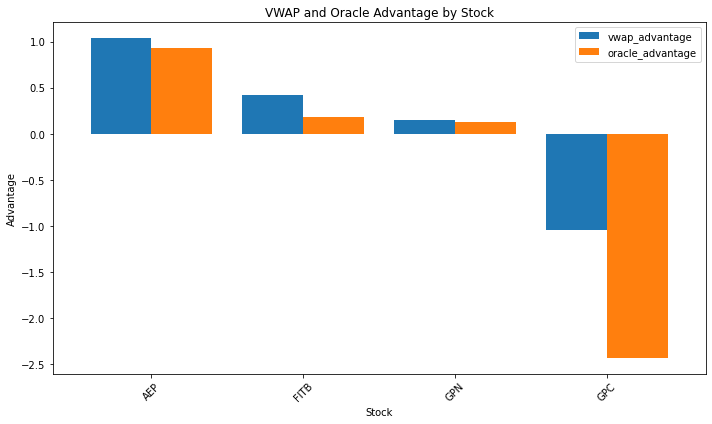

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'vwap_advantage': [1.034446, 0.422905, 0.144582, -1.048364],
    'oracle_advantage': [0.931860, 0.183643, 0.122775, -2.428116]
}
index = ['AEP', 'FITB', 'GPN', 'GPC']
df = pd.DataFrame(data, index=index)

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Title and labels
plt.title('VWAP and Oracle Advantage by Stock')
plt.xlabel('Stock')
plt.ylabel('Advantage')
plt.xticks(rotation=45)  # Rotate stock names for better readability

# Display the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


## find at what percentage level the best bid level was all taken

In [3]:
from os import listdir
from tqdm import tqdm
symbol = "AEP"
path = f'/scratch/local/kang/SP500/{symbol}_data/Book_10/'
# obs = [pd.read_csv(path+file) for file in tqdm(listdir(ATFolder+"/Book_10/"))]
obs = [pd.read_csv(path+file, header = None) for file in tqdm(listdir(ATFolder+"/Book_10/")[:2])]


100%|██████████| 2/2 [00:00<00:00,  3.84it/s]


In [36]:
ob = obs[0]
obs1 = ob.iloc[:,[0,1,4,5]]
obs1

,0,1,4,5
0,9999999999,0,9999999999,0
1,1999999900,100,9999999999,0
2,639400,130,1999999900,100
3,639400,130,1999999900,100
4,639400,130,1999999900,100
...,...,...,...,...
191942,628400,100,628500,100
191943,628400,100,628500,100
191944,628400,100,628500,100
191945,628500,100,628600,100


In [49]:
ob = obs[0]
obs1 = ob.iloc[:,:4]
obs1.columns = ['best_ask','best_qty','second_ask','second_qty']
# obs1.bid_qty.sum()
obs1

,best_ask,best_qty,second_ask,second_qty
0,9999999999,0,100,100
1,1999999900,100,100,100
2,639400,130,100,100
3,639400,130,579000,300
4,639400,130,579000,300
...,...,...,...,...
191942,628400,100,626800,100
191943,628400,100,626800,200
191944,628400,100,626800,100
191945,628500,100,626800,100


In [5]:
from os import listdir
symbol = "AEP"
path = f'/scratch/local/kang/SP500/{symbol}_data/Flow_10/'
# obs = [pd.read_csv(path+file) for file in tqdm(listdir(ATFolder+"/Book_10/"))]
msgs = [pd.read_csv(path+file, header = None) for file in tqdm(listdir(ATFolder+"/Flow_10/")[:2])]

100%|██████████| 2/2 [00:00<00:00, 11.63it/s]


In [6]:
msg = msgs[0]

In [7]:
msg.columns = ['time','type','id','qty','price','direct','remark']

In [8]:
msg

,time,type,id,qty,price,direct,remark
0,25200.285753,1,4471037,100,100,1,MZHO
1,25200.285755,1,4471041,100,1999999900,-1,MZHO
2,28349.135951,1,5853149,130,639400,-1,NaN
3,28800.264984,1,6149129,300,579000,1,NaN
4,28802.404960,1,6157221,50,89500,1,NaN
...,...,...,...,...,...,...,...
191942,57796.887396,3,280442389,100,626500,1,NaN
191943,57796.888729,1,280513937,100,626800,1,NaN
191944,57839.816736,3,280513937,100,626800,1,NaN
191945,57859.251433,3,280096397,100,628400,-1,NaN


In [50]:
df=pd.concat([msg,obs1],axis=1)
df.time *= 1e9
df.time=df.time.apply(pd.to_datetime)
df.time = df.time.dt.time
df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)
df = df[(df['shorten_time']>='0930') & (df['shorten_time']<'1600')] 
df

,time,type,id,qty,price,direct,remark,best_ask,best_qty,second_ask,second_qty,shorten_time
144,09:30:00.001647,1,11393385,100,630300,-1,NaN,630300,200,624700,100,0930
145,09:30:00.020841,6,-1,0,0,-1,NaN,630300,200,624700,100,0930
146,09:30:00.065829,3,11261557,100,634200,-1,NaN,630300,200,624700,100,0930
147,09:30:00.145081,1,11461093,100,645200,-1,NaN,630300,200,624700,100,0930
148,09:30:00.145082,1,11461097,100,636100,-1,NaN,630300,200,624700,100,0930
...,...,...,...,...,...,...,...,...,...,...,...,...
191790,15:59:59.924294,3,278997597,100,627700,-1,NaN,627600,140,627500,400,1559
191791,15:59:59.925418,1,280162505,100,627400,1,NaN,627600,140,627500,400,1559
191792,15:59:59.933614,3,280162505,100,627400,1,NaN,627600,140,627500,400,1559
191793,15:59:59.996775,3,280096253,100,628200,-1,NaN,627600,140,627500,400,1559


In [51]:
df['trading_volume'] = df[df.type==4].qty.sum()
task_ratio = 0.05
df['task_volume'] = (df.trading_volume * task_ratio).apply(int)
df

,time,type,id,qty,price,direct,remark,best_ask,best_qty,second_ask,second_qty,shorten_time,trading_volume,task_volume
144,09:30:00.001647,1,11393385,100,630300,-1,NaN,630300,200,624700,100,0930,260014,13000
145,09:30:00.020841,6,-1,0,0,-1,NaN,630300,200,624700,100,0930,260014,13000
146,09:30:00.065829,3,11261557,100,634200,-1,NaN,630300,200,624700,100,0930,260014,13000
147,09:30:00.145081,1,11461093,100,645200,-1,NaN,630300,200,624700,100,0930,260014,13000
148,09:30:00.145082,1,11461097,100,636100,-1,NaN,630300,200,624700,100,0930,260014,13000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191790,15:59:59.924294,3,278997597,100,627700,-1,NaN,627600,140,627500,400,1559,260014,13000
191791,15:59:59.925418,1,280162505,100,627400,1,NaN,627600,140,627500,400,1559,260014,13000
191792,15:59:59.933614,3,280162505,100,627400,1,NaN,627600,140,627500,400,1559,260014,13000
191793,15:59:59.996775,3,280096253,100,628200,-1,NaN,627600,140,627500,400,1559,260014,13000


In [52]:
dfa = df.drop_duplicates('shorten_time', keep = 'last')
dfa

,time,type,id,qty,price,direct,remark,best_ask,best_qty,second_ask,second_qty,shorten_time,trading_volume,task_volume
223,09:30:41.282502,3,12709625,100,636200,-1,NaN,630200,100,628600,34,0930,260014,13000
406,09:31:57.153245,1,14105653,100,628400,-1,NaN,628400,300,626600,400,0931,260014,13000
552,09:32:58.134833,1,14937929,100,627800,-1,NaN,627700,100,625400,200,0932,260014,13000
933,09:33:59.749858,1,15754257,100,626600,-1,NaN,626100,200,624200,200,0933,260014,13000
1179,09:34:51.762809,1,16520221,100,627300,-1,NaN,626900,100,625700,100,0934,260014,13000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188193,15:55:59.905698,3,273901457,54,627200,1,NaN,627300,549,627200,1312,1555,260014,13000
189380,15:56:59.816816,1,275092061,100,627600,1,NaN,627700,665,627600,200,1556,260014,13000
189801,15:57:59.899061,3,275877989,100,627500,1,NaN,627600,300,627500,416,1557,260014,13000
190608,15:58:59.785592,1,277540309,100,627400,1,NaN,627600,100,627500,240,1558,260014,13000


In [41]:
date = '2017-07-20'

In [28]:
def get_aligned_values(VWAPs):
    vwap = VWAPs[symbol].loc[date,:]
    vwap = vwap.reset_index()
    vwap.timeHMs = vwap.timeHMs.astype(int).astype(str).apply(lambda x: x.zfill(4))
    vwap.drop('level_0',axis = 1,inplace=True)
    time_df = pd.DataFrame(df.shorten_time.unique(),columns = ['timeHMs'])
    dfb = pd.merge(vwap, time_df, how = 'right',on='timeHMs')
    dfb.fillna(method='ffill',inplace = True)
    return dfb.iloc[:,-1].to_numpy()
rm = get_aligned_values(RMs)
rm

array([17467.2, 17467.2, 17467.2, 17467.2, 17467.2, 17467.2, 17467.2,
       17467.2, 17467.2, 17467.2, 17467.2, 17467.2, 17467.2, 17467.2,
       17467.2, 21340.3, 21340.3, 21340.3, 21340.3, 21340.3, 21340.3,
       21340.3, 21340.3, 21340.3, 21340.3, 21340.3, 21340.3, 21340.3,
       21340.3, 21340.3, 22025.5, 22025.5, 22025.5, 22025.5, 22025.5,
       22025.5, 22025.5, 22025.5, 22025.5, 22025.5, 22025.5, 22025.5,
       22025.5, 22025.5, 22025.5, 18910.3, 18910.3, 18910.3, 18910.3,
       18910.3, 18910.3, 18910.3, 18910.3, 18910.3, 18910.3, 18910.3,
       18910.3, 18910.3, 18910.3, 18910.3, 20013.6, 20013.6, 20013.6,
       20013.6, 20013.6, 20013.6, 20013.6, 20013.6, 20013.6, 20013.6,
       20013.6, 20013.6, 20013.6, 20013.6, 20013.6, 17431.2, 17431.2,
       17431.2, 17431.2, 17431.2, 17431.2, 17431.2, 17431.2, 17431.2,
       17431.2, 17431.2, 17431.2, 17431.2, 17431.2, 17431.2, 15369.1,
       15369.1, 15369.1, 15369.1, 15369.1, 15369.1, 15369.1, 15369.1,
       15369.1, 1536

In [ ]:
(base) kang@flair-node-01:~/AlphaTrade/gymnax_exchange/jaxrl$ python -m pip list | grep jax
jax                           0.4.16
jax-jumpy                     1.0.0
jaxlib                        0.4.12
(base) kang@flair-node-01:~/AlphaTrade/gymnax_exchange/jaxrl$ pip install jax==0.4.12

In [16]:
import jax
import jax.numpy as jnp
@jax.jit
def hamilton_apportionment_permuted_jax(votes, seats, key):
    init_seats, remainders = jnp.divmod(votes, jnp.sum(votes) / seats) # std_divisor = jnp.sum(votes) / seats
    remaining_seats = jnp.array(seats - init_seats.sum(), dtype=jnp.int32) # in {0,1,2,3}
    def f(carry,x):
        key,init_seats,remainders=carry
        key, subkey = jax.random.split(key)
        chosen_index = jax.random.choice(subkey, remainders.size, p=(remainders == remainders.max())/(remainders == remainders.max()).sum())
        return (key,init_seats.at[chosen_index].add(jnp.where(x < remaining_seats,1,0)),remainders.at[chosen_index].set(0)),x
    (key,init_seats,remainders), x = jax.lax.scan(f,(key,init_seats,remainders),xs=jnp.arange(votes.shape[0]))
    return init_seats.astype(jnp.int32)

In [17]:
rng = jax.random.PRNGKey(0)
rng, key = jax.random.split(rng, 2)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [18]:
dfa.trading_volume.iloc[0]

260014

In [53]:
dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)
dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)
dfa['rm'] = hamilton_apportionment_permuted_jax(get_aligned_values(RMs), dfa.task_volume.iloc[0], key)
dfa['twap'] = hamilton_apportionment_permuted_jax(get_aligned_values(TWAPs), dfa.task_volume.iloc[0], key) 
# dfa['vwap']=dfa['vwap']/dfa['vwap'].sum()*dfa.task_volume
# dfa['oracle']=dfa['oracle']/dfa['oracle'].sum()*dfa.task_volume
# dfa['rm']=dfa['rm']/dfa['rm'].sum()*dfa.task_volume
# dfa['twap']=dfa['twap']/dfa['twap'].sum()*dfa.task_volume
dfa

/tmp/ipykernel_2672345/595264120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)
/tmp/ipykernel_2672345/595264120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)
/tmp/ipykernel_2672345/595264120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,time,type,id,qty,price,direct,remark,best_ask,best_qty,second_ask,second_qty,shorten_time,trading_volume,task_volume,vwap,oracle,rm,twap
223,09:30:41.282502,3,12709625,100,636200,-1,NaN,630200,100,628600,34,0930,260014,13000,54,48,31,33
406,09:31:57.153245,1,14105653,100,628400,-1,NaN,628400,300,626600,400,0931,260014,13000,54,48,31,34
552,09:32:58.134833,1,14937929,100,627800,-1,NaN,627700,100,625400,200,0932,260014,13000,54,48,31,33
933,09:33:59.749858,1,15754257,100,626600,-1,NaN,626100,200,624200,200,0933,260014,13000,54,48,31,33
1179,09:34:51.762809,1,16520221,100,627300,-1,NaN,626900,100,625700,100,0934,260014,13000,54,48,31,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188193,15:55:59.905698,3,273901457,54,627200,1,NaN,627300,549,627200,1312,1555,260014,13000,78,54,83,33
189380,15:56:59.816816,1,275092061,100,627600,1,NaN,627700,665,627600,200,1556,260014,13000,78,54,83,33
189801,15:57:59.899061,3,275877989,100,627500,1,NaN,627600,300,627500,416,1557,260014,13000,78,54,83,33
190608,15:58:59.785592,1,277540309,100,627400,1,NaN,627600,100,627500,240,1558,260014,13000,78,54,83,33


In [54]:
assert (dfa.best_qty+dfa.second_qty>=dfa.vwap).all()
assert (dfa.best_qty+dfa.second_qty>=dfa.oracle).all()
assert (dfa.best_qty+dfa.second_qty>=dfa.rm).all()
assert (dfa.best_qty+dfa.second_qty>=dfa.twap).all()

In [65]:
def f(x,string):
    if x.best_qty>=x[string]:
        price = x.best_ask * x[string]
    else:
        price = x.best_ask*x.best_qty + x.second_ask*(x[string]-x.best_qty)
    return price
for s in ['vwap','oracle','rm','twap']:
    dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)
dfa

/tmp/ipykernel_2672345/900787688.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)
/tmp/ipykernel_2672345/900787688.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)
/tmp/ipykernel_2672345/900787688.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,time,type,id,qty,price,direct,remark,best_ask,best_qty,second_ask,...,rm,twap,vwap_price,oracle_price,rm_price,twap_price,vwap_revenue,oracle_revenue,rm_revenue,twap_revenue
223,09:30:41.282502,3,12709625,100,636200,-1,NaN,630200,100,628600,...,31,33,630200,630200,630200,630200,34030800,30249600,19536200,20796600
406,09:31:57.153245,1,14105653,100,628400,-1,NaN,628400,300,626600,...,31,34,628400,628400,628400,628400,33933600,30163200,19480400,21365600
552,09:32:58.134833,1,14937929,100,627800,-1,NaN,627700,100,625400,...,31,33,627700,627700,627700,627700,33895800,30129600,19458700,20714100
933,09:33:59.749858,1,15754257,100,626600,-1,NaN,626100,200,624200,...,31,33,626100,626100,626100,626100,33809400,30052800,19409100,20661300
1179,09:34:51.762809,1,16520221,100,627300,-1,NaN,626900,100,625700,...,31,33,626900,626900,626900,626900,33852600,30091200,19433900,20687700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188193,15:55:59.905698,3,273901457,54,627200,1,NaN,627300,549,627200,...,83,33,627300,627300,627300,627300,48929400,33874200,52065900,20700900
189380,15:56:59.816816,1,275092061,100,627600,1,NaN,627700,665,627600,...,83,33,627700,627700,627700,627700,48960600,33895800,52099100,20714100
189801,15:57:59.899061,3,275877989,100,627500,1,NaN,627600,300,627500,...,83,33,627600,627600,627600,627600,48952800,33890400,52090800,20710800
190608,15:58:59.785592,1,277540309,100,627400,1,NaN,627600,100,627500,...,83,33,627600,627600,627600,627600,48952800,33890400,52090800,20710800


In [67]:
dfs = dfa.sum()
dfs

/tmp/ipykernel_2672345/4185810154.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfs = dfa.sum()


type                                                            708
id                                                      61894889734
qty                                                           38774
price                                                     244457000
direct                                                          -18
remark                                                            0
best_ask                                                  244507400
best_qty                                                     106514
second_ask                                                244392900
second_qty                                                    95459
shorten_time      0930093109320933093409350936093709380939094009...
trading_volume                                            101405460
task_volume                                                 5070000
vwap                                                          13000
oracle                                          

In [72]:
vwap_advanrage = (dfs.vwap_revenue-dfs.rm_revenue)/dfs.rm_revenue * 1e4
vwap_advanrage

-0.13350914327796312

In [73]:
oracle_advanrage = (dfs.oracle_revenue-dfs.rm_revenue)/dfs.rm_revenue * 1e4
oracle_advanrage

0.22836444452232477

In [ ]:
[date, vwap_advanrage, oracle_advanrage]

In [51]:
total_volume = msg[msg.type==4].qty.sum()

In [53]:
total_volume*0.01

37777.57

# run r to get the cmem results

In [5]:
cd /homes/80/kang/cmem/data_minmax/02.2_data_r_input_kf_minmax/

/homes/80/kang/cmem/data_minmax/02.2_data_r_input_kf_minmax


In [6]:
path = '/homes/80/kang/cmem/data_minmax/02.2_data_r_input_kf_minmax/'
from os import listdir
lst = listdir(path)
lstt = [file[:-4] for file in lst]

In [7]:
for idx, itm in enumerate(lstt):
    if itm in lstsymbols:
        print(idx, itm)

3 AAPL
16 AEP
174 FITB
196 GPN
199 GS


## use this r code:
/homes/80/kang/cmem/rkf_fraction.r
## hers is the output dir
/homes/80/kang/cmem/output/0400_r_kl_output_raw_data_minmax/


## check whether all the data is generated correctly

In [8]:
%%bash
cd /homes/80/kang/cmem/output/0400_r_kl_output_raw_data_minmax/
ls | wc

    472     472    3833


In [9]:
#  note the data might not all generated

# we have to generate this after the r code output: 
0900_r_output_with_features_csv_fractional_shares_clipped_vwap

## get symbol  codes

In [5]:
dir = '/homes/80/kang/cmem/output/0400_r_kl_output_raw_data_minmax/'
import os 
from os import listdir
lst = sorted([file[:-4] for file in listdir(dir)])
len(lst)

472

In [13]:
file_path = '/homes/80/kang/cmem/stock_names.txt'
reloaded_stock_names = []
with open(file_path, 'r') as f:
    reloaded_stock_names = [line.strip() for line in f.readlines()]
reloaded_stock_names,len(reloaded_stock_names)
lst = reloaded_stock_names

### from mihai's shares outstanding data

In [14]:
from os import listdir
from os.path import isfile, join
dir0 = "/homes/80/kang/2017daily_csv/"
onlyFiles = sorted([f for f in listdir(dir0) if isfile(join(dir0, f))])
dfflst =[]
i=0
# for i in range(len(onlyFiles)):
print(i)
name = onlyFiles[i]
import pandas as pd
# name ="CMS.csv"

dir = dir0+name
df = pd.read_csv(dir)
mhlst = sorted(df.ticker.to_list())
len(mhlst)
lstt = [file for file in mhlst if file in lst]
len(lstt)

0


384

In [15]:
lst0=[file for file in lst if file not in lstt]
len(lst0)

99

### lst0 is the missing parts

In [16]:
lst0

['A',
 'AAPL',
 'ADBE',
 'ADSK',
 'AKAM',
 'ALGN',
 'ALXN',
 'AMAT',
 'AMGN',
 'AMZN',
 'ANSS',
 'ATVI',
 'AVGO',
 'BF.B',
 'BIIB',
 'BRK.B',
 'CBOE',
 'CDW',
 'CERN',
 'CHRW',
 'CHTR',
 'CINF',
 'CMCSA',
 'COST',
 'CPRT',
 'CSCO',
 'CTAS',
 'CTSH',
 'CTXS',
 'DISCA',
 'DISCK',
 'DISH',
 'DLTR',
 'EA',
 'EBAY',
 'EQIX',
 'EXPD',
 'EXPE',
 'FANG',
 'FAST',
 'FFIV',
 'FISV',
 'FITB',
 'FLIR',
 'FTNT',
 'GILD',
 'GOOG',
 'GOOGL',
 'GRMN',
 'HBAN',
 'HOLX',
 'HSIC',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'IPGP',
 'ISRG',
 'JBHT',
 'JKHY',
 'KHC',
 'KLAC',
 'LKQ',
 'LRCX',
 'MCHP',
 'MKTX',
 'MNST',
 'MSFT',
 'MXIM',
 'NDAQ',
 'NFLX',
 'NTAP',
 'NTRS',
 'NVDA',
 'NWSA',
 'ODFL',
 'ORLY',
 'PAYX',
 'PBCT',
 'PCAR',
 'PYPL',
 'QCOM',
 'QRVO',
 'REGN',
 'ROST',
 'SBAC',
 'SBUX',
 'SIVB',
 'SNPS',
 'SWKS',
 'TRIP',
 'TROW',
 'TSCO',
 'TTWO',
 'ULTA',
 'VRSK',
 'VRSN',
 'VRTX',
 'WYNN']